# Workshop 01
## Construction of trajectories in discrete dynamical systems

------------

Let $x \in \mathbb{R}^n$, $x$ exhibits discrete behaviors as

$$ x^+ = f(x) $$

where $f: \mathbb{R}^n \to \mathbb{R}^n$

### 1. Consider the function $g(x) = 4x-12$ 

### 1.1. What are the first five iterates of the seed $x_0 = 0$

In [1]:
from dslib import *


def g(x):
    return 4*x-12

n = 5
t = list(range(n+1))
x = gen_traj(g, seed=0, num=n)
print(f'State x: {x}')
print(f'Time t: {t}')

State x: [0, -12, -60, -252, -1020, -4092]
Time t: [0, 1, 2, 3, 4, 5]


In [16]:
cols = ['Time: $t$', 'State: $x_t$']
text1 = gen_latex_table(t, x, colname=cols, align='ll')
print(text1)

\begin{tabular}{ll}
\hline
Time: $t$ & State: $x_t$\\
\hline
0 & 0\\
1 & -12\\
2 & -60\\
3 & -252\\
4 & -1020\\
5 & -4092\\
\hline
\end{tabular}


In [15]:
help(gen_traj)

Help on function gen_traj in module dslib:

gen_traj(func=None, seed=0, num=10)
    Generate trajectory
    Argumenets:
        func       A function in the iteration
        seed       Initial value in the iteration
        num        Number of iteration



### 1.2. What are the first ten iterates of the seed  $x_0 = 5$

In [17]:
x = gen_traj(g, num=20, seed=5)
print(x)

[5, 8, 20, 68, 260, 1028, 4100, 16388, 65540, 262148, 1048580, 4194308, 16777220, 67108868, 268435460, 1073741828, 4294967300, 17179869188, 68719476740, 274877906948, 1099511627780]


--------------
### 2. Consider the function $$h(x) = \dfrac{1}{2}\cdot x + 10.$$ Calculate the first ten iterates of $h$ for the initial condition $x_0 = 4$, and then sketch this itinerary in a time series plot.

In [22]:
def h(x):
    return 0.5*x + 10

trj = gen_traj(h, seed=4, num=10)
time = list(range(11))
print(f'time = {time}\ntrj = {trj}')

time = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
trj = [4, 12.0, 16.0, 18.0, 19.0, 19.5, 19.75, 19.875, 19.9375, 19.96875, 19.984375]


''

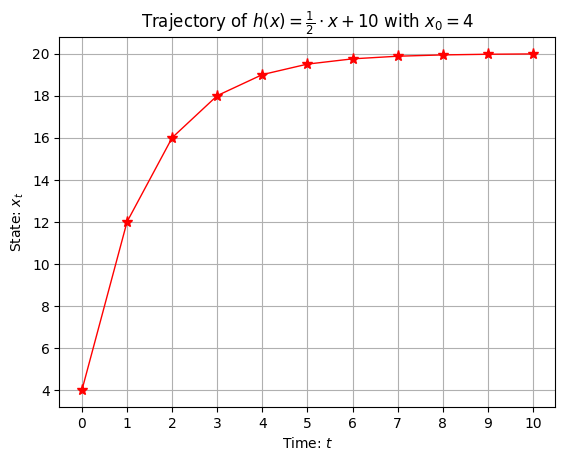

In [55]:
import matplotlib.pyplot as plt

plt.grid()
plt.plot(time, trj, marker='*', markersize=8, linewidth=1, color='red')
plt.xlabel('Time: $t$')
plt.ylabel('State: $x_t$')
plt.xticks(list(range(11)))
plt.title(r'Trajectory of $h(x) = \frac{1}{2}\cdot x + 10$ with $x_0 = 4$')
# plt.savefig('trj_h.pdf')
;

-------------

### 3. Consider the function $f(x) = x^3$.

### 3.1. Find all the fixed points of $f$.

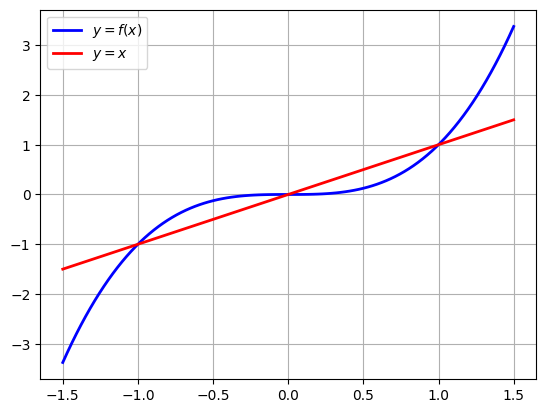

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from dslib import *

def f(x):
    return x**3

x = np.linspace(-1.5, 1.5, num=100)
y = f(x)

plt.grid()
plt.plot(x, y, color='blue', linewidth=2, label='$y = f(x)$')
plt.plot(x, x, color='red', linewidth=2, label='$y = x$')
plt.legend()
plt.show()

In [28]:
def find_root(f, ini=None, method=None, df=None, tol=1e-5):
    if method == 'Newton':
        xnow = ini
        run = True
        while run:
            xnew = xnow - f(xnow)/df(xnow)
            xnow = xnew
            epsilon = abs(f(xnow))
            if epsilon <= tol:
                run = False
        sol = xnow
    elif method == 'bisection':
        xl = ini[0]
        xu = ini[1]
        run = True
        while run:
            xr = 0.5*(xl+xu)
            if f(xl)*f(xr) < 0:
                xu = xr
            else:
                xl = xr
            epsilon = abs(f(xr))
            if epsilon <= tol:
                run = False
        sol = xr
    return sol

def find_fixed_point(func, **kwargs):
    def g(x):
        return func(x) - x
    return find_root(g, **kwargs)

In [33]:
def f(x):
    return x**3

x1 = find_fixed_point(f, ini=[-1.5, -0.5], method='bisection', tol=1e-10)
print(x1, f(x1))

x2 = find_fixed_point(f, ini=[-0.5, 0.5], method='bisection', tol=1e-10)
print(x2, f(x2))

x3 = find_fixed_point(f, ini=[0.5, 1.5], method='bisection', tol=1e-10)
print(x3, f(x3))

-1.0 -1.0
0.0 0.0
1.0 1.0


### 3.2. What is the phase line for the function $f$? Consider both positive and negative seeds.

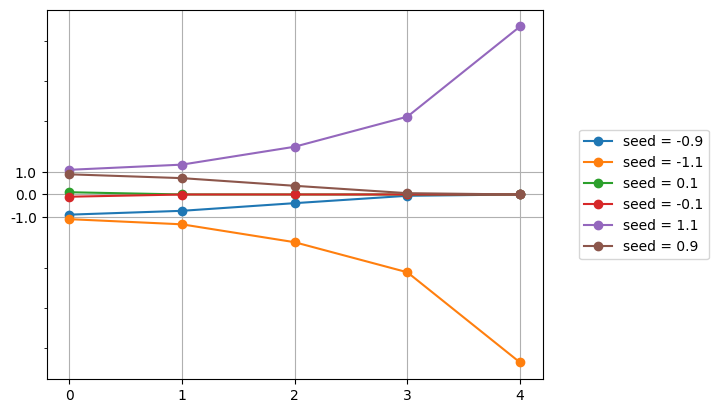

In [74]:
fp = [x1, x2, x3]

n = 4
nbh_size = 0.1
t = list(range(n+1))
for x in fp:
    trj1 = gen_traj(f, seed=x+nbh_size, num=n)
    trj2 = gen_traj(f, seed=x-nbh_size, num=n)    
    plt.plot(t, trj1, marker='o', label=f'seed = {x+nbh_size}')
    plt.plot(t, trj2, marker='o', label=f'seed = {x-nbh_size}')
plt.grid()
plt.yscale('symlog')
plt.xticks(t)
plt.yticks(fp, labels=fp)
plt.legend(loc='right', bbox_to_anchor=(1.35,0.5))
plt.show()

In [190]:
def phaseline_plot(func, fp, sample=2, iternum=5, **kwargs):
    ext = (fp[-1] - fp[0])/(len(fp)-1)
    fpext = np.linspace(min(fp)-ext, max(fp)+ext, num=2)
    plt.plot(fp, [0]*len(fp), marker='o', linewidth=2, color='black')
    plt.plot(fpext, [0]*2, color='black', linewidth=2)
    plt.xticks(fp)
    plt.yticks([])
    fp_w_lr = [min(fp)-ext] + fp + [max(fp)+ext]
    num_arrows = len(fp_w_lr)-1 
    arrows = []
    for k in range(num_arrows):
        a = list(np.linspace(fp_w_lr[k], fp_w_lr[k+1], num=sample+2))
        a.pop(0)
        a.pop(-1)
        arrows += a
    shapes = [None] * len(arrows)
    for k in range(len(arrows)):
        seed = arrows[k]
        term = gen_traj(func, seed=seed, num=iternum)[-1]
        shapes[k] = 1 if term - seed > 0 else -1   
    plt.quiver(arrows, [0]*len(arrows), shapes, [0]*len(arrows), **kwargs)
    plt.show()

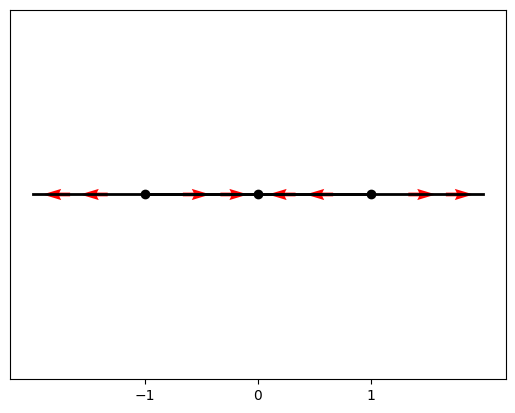

In [191]:
phaseline_plot(f, fp=[-1, 0, 1], color='red')

### 3.3. Determine the stability of all of the fixed points of $f$. 

------------------

### 4. Consider the function $g(x) = x^2 − 3$.

### 4.1. Determine the first few iterates for the seed $x_0 = 1$.

In [186]:
def g(x):
    return x**2 - 3

trj = gen_traj(g, seed=1, num=3)
print(trj)

[1, -2, 1, -2]


### 4.2. Make a time series plot of the orbit. How would you describe this behavior?

In [173]:
def traj_plot(func, seed=None, seeds=None, num=5, yscale='linear', **kwargs):
    if seed is not None:
        seeds = [seed]
    t = list(range(num+1))
    for s in seeds:
        trj = gen_traj(func, seed=s, num=num)
        plt.plot(t, trj, marker='o', label=f'seed = {s}', **kwargs)
    plt.xticks(t)
    plt.yscale(yscale)
    plt.grid()
    plt.legend()
    plt.show()

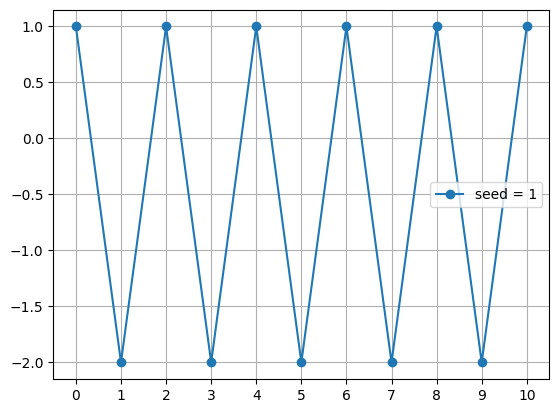

In [160]:
traj_plot(g, seed=1, num=10)

### 4.3. Is this behavior stable? Try iterating a seed close to $x_0$ and see what happens.

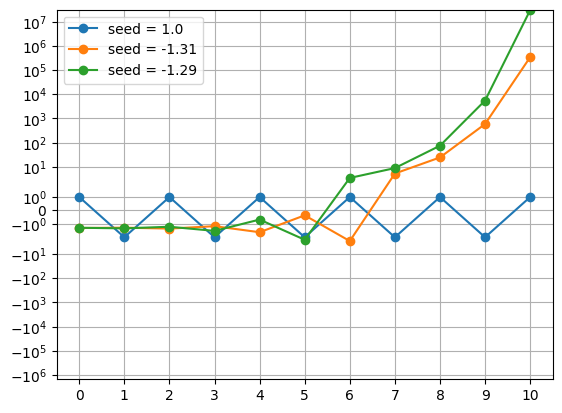

In [180]:
traj_plot(g, seeds=[1.0, -1.31, -1.29], num=10, yscale='symlog')

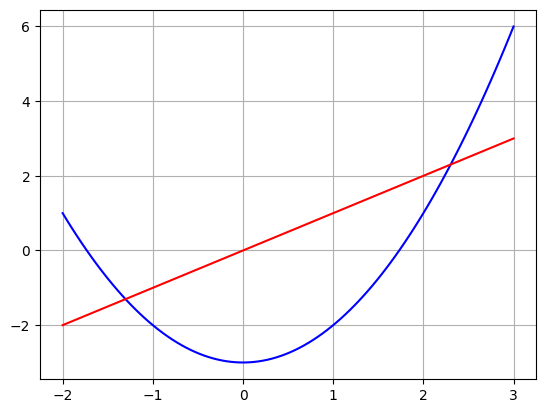

In [187]:
x = np.linspace(-2, 3, num=100)
plt.plot(x, g(x), color='blue')
plt.plot(x, x, color='red')
plt.grid()
plt.show()

In [188]:
fp1 = find_fixed_point(g, ini=[-2, -1], method='bisection')
fp2 = find_fixed_point(g, ini=[2, 3], method='bisection')

print(fp1, fp2)

-1.3027763366699219 2.302776336669922


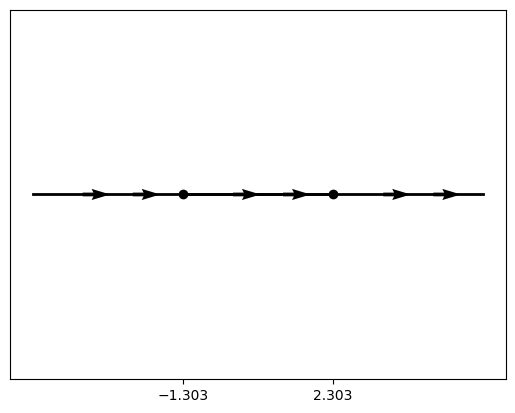

In [193]:
phaseline_plot(g, fp=[fp1, fp2], iternum=5)

---------------
### 5. Find all fixed points for the function $f(x) = x + 1$.

----------------
### 6. Determine all fixed points for the function $f(x) = \sqrt{2}x$. Which fixed point(s) are stable and which are unstable?

---------------

### 7. Find all fixed points for the function $f(x) = 2^x$.

---------------
### 8. Calculate orbits for the function $$f(x) = 2.5x(1 − x).$$ What is the long-term behavior of seeds between 0 and 1 for this function?

-------------------------

<font size=2>

#### Update list

| Date      | Commit Message      |      by      |
|:----------|:--------------------|-------------:|
| 2023/12/05| Initial created     | R. Promkam   |

</font>

-------------------------
<p style="text-align: center;"><font size=1>All rights reserved. This document, figures and data are published under MIT License.</font></p>